In [1]:
import os, sys
from collections import defaultdict
from tqdm import tqdm
import time

In [2]:
import gymnasium as gym
import text_flappy_bird_gym
from flappy_bird_gymnasium import *
from tabulate import tabulate
import numpy as np
import matplotlib.pyplot as plt

In [3]:
class MonteCarlo:
    def __init__(self, gamma, epsilon=0.1):
        """
        Initialize the Monte Carlo agent.

        Args:
            env (gym.Env): The environment to use.
            gamma (float): The discount factor.
            n_episodes (int): The number of episodes to train for.
            epsilon (float): The probability of selecting a random action.
        """
        
        self.gamma = gamma
        self.epsilon = epsilon
        self.Q = defaultdict(lambda: 0)
        self.N = defaultdict(lambda: 0)
    
    def choose_action(self, state):
        """
        Choose an action to take given a state.

        Args:
            state: The current state.

        Returns:
            The chosen action.
        """
        
        if np.random.uniform(0, 1) < self.epsilon:
            return np.random.randint(2)
        else:
            return np.argmax([self.Q[(state,0)],self.Q[(state,1)]])

    def update_Q(self, episode):
        """
        Update the Q values given an episode.

        Args:
            episode: The episode to use for updating.

        Returns:
            None.
        """
        
        G = 0
        visited = set()
        for t in reversed(range(len(episode))):
            state, action, reward = episode[t]
            G = self.gamma * G + reward
            if (state, action) not in visited:
                self.N[(state, action)] += 1
                self.Q[(state, action)] += (G - self.Q[state, action]) / self.N[state, action]
                visited.add((state, action))
    
    def train(self,env, n_episodes):
        """Train the agent (include both exploration and exploitation)
        Args:
            env (gym.env): the environment
            num_episodes (int): the number of episodes to train the agent on
            
        Returns:
            rewards (list): list of the sum of rewards obtained for each episode
            scores (list) : list of the scores obtained for each episode
        """
        rewards = []
        scores=[]
        for i in tqdm(range(n_episodes)):
            state,_ = env.reset()
            done = False
            episode = []
            episode_reward = 0
            while not done:
                action = self.choose_action(state)
                next_state, reward,done,_, info = env.step(action)
                episode.append((state, action, reward))
                episode_reward += reward
                state = next_state
            self.update_Q(episode)
            rewards.append(episode_reward)
            scores.append(info['score'])
        return rewards,scores  
    
    def test(self,env, n_episodes):
        """Test the agent (include only exploitation)
        Args:
            env (gym.env): the environment
            num_episodes (int): the number of episodes to train the agent on
            
        Returns:
            rewards (list): list of the sum of rewards obtained for each episode
            scores (list): list of the scores obtained for each episode
        """
        rewards = []
        scores=[]
        for i in tqdm(range(n_episodes)):
            state,_ = env.reset()
            done = False
            episode_reward = 0
            while not done:
                action = np.argmax([self.Q[state,0],self.Q[state,1]])
                next_state, reward,done,_, info = env.step(action)
                episode_reward += reward
                state = next_state
                if info['score'] >1e5: #Stopping condition to avoid it to be stuck if it never dies
                    break
            rewards.append(episode_reward)
            scores.append(info['score'])
        return rewards,scores
    def run(self, env):
        state,_ = env.reset()
        done = False
        episode_reward = 0
        while not done:
            action = np.argmax([self.Q[state,0], self.Q[state,1]])
            next_state, reward,done,_, info = env.step(action)
            episode_reward += reward
            state = next_state
            if info['score'] >1e2: #Stopping condition to avoid it to be stuck if it never dies
                break
            os.system("clear")
            sys.stdout.write(env.render())
            time.sleep(0.2) # FPS
        return info['score']

100%|██████████| 10000/10000 [00:03<00:00, 2663.51it/s]


Average reward over 10000 train episodes: 21.7439
Median reward over 10000 train episodes: 14.0
Average scores over 10000 train episodes: 0.9451
Median scores over 10000 train episodes: 0.0


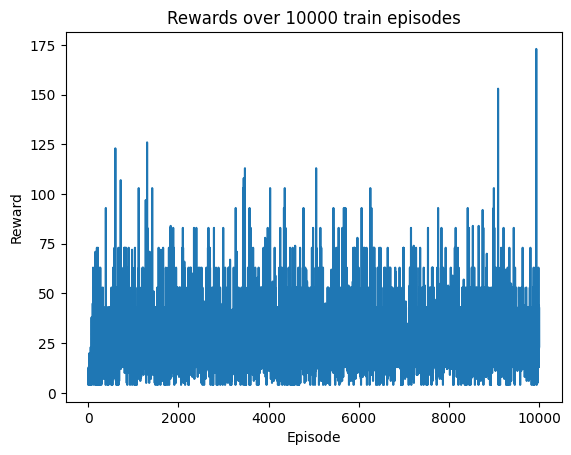

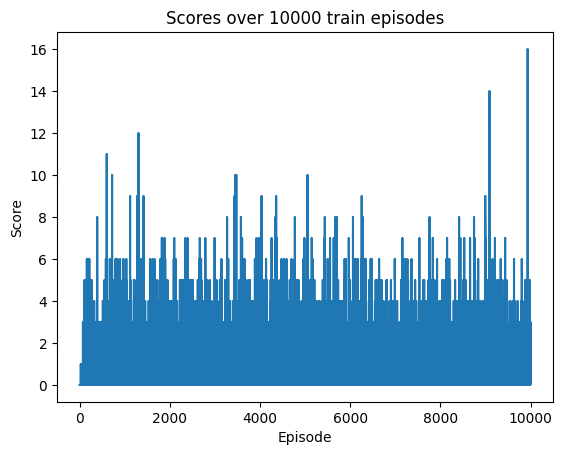

In [4]:
env = gym.make('TextFlappyBird-v0', height=15, width=20, pipe_gap=4)


n_episodes = 10000
# create the Monte Carlo agent
mc_agent = MonteCarlo(gamma=0.5, epsilon=0.5)

# train the Monte Carlo agent
train_rewards, train_scores = mc_agent.train(env,n_episodes)

print(f"Average reward over {n_episodes} train episodes:", np.mean(train_rewards))
print(f"Median reward over {n_episodes} train episodes:", np.median(train_rewards))
print(f"Average scores over {n_episodes} train episodes:", np.mean(train_scores))
print(f"Median scores over {n_episodes} train episodes:", np.median(train_scores))


# plot the rewards
plt.plot(train_rewards)
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.title(f"Rewards over {n_episodes} train episodes")
plt.show()

# plot the scores
plt.plot(train_scores)
plt.xlabel("Episode")
plt.ylabel("Score")
plt.title(f"Scores over {n_episodes} train episodes")
plt.show()

100%|██████████| 20000/20000 [00:33<00:00, 601.44it/s]


Average reward over 20000 train episodes: 110.6113
Median reward over 20000 train episodes: 75.0
Average scores over 20000 train episodes: 9.85755
Median scores over 20000 train episodes: 7.0


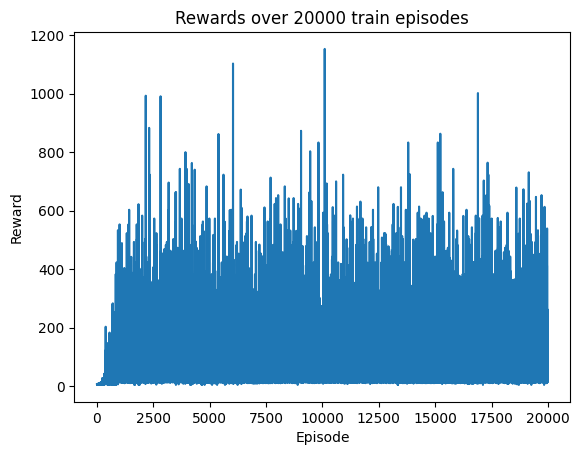

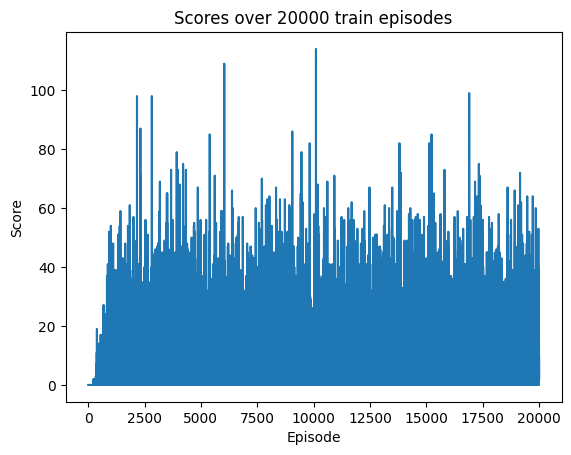

In [5]:
env = gym.make('TextFlappyBird-v0', height=15, width=20, pipe_gap=4)


n_episodes = 20000
# create the Monte Carlo agent
mc_agent = MonteCarlo(gamma=0.9, epsilon=0.1)

# train the Monte Carlo agent
train_rewards, train_scores = mc_agent.train(env,n_episodes)

print(f"Average reward over {n_episodes} train episodes:", np.mean(train_rewards))
print(f"Median reward over {n_episodes} train episodes:", np.median(train_rewards))
print(f"Average scores over {n_episodes} train episodes:", np.mean(train_scores))
print(f"Median scores over {n_episodes} train episodes:", np.median(train_scores))


# plot the rewards
plt.plot(train_rewards)
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.title(f"Rewards over {n_episodes} train episodes")
plt.show()

# plot the scores
plt.plot(train_scores)
plt.xlabel("Episode")
plt.ylabel("Score")
plt.title(f"Scores over {n_episodes} train episodes")
plt.show()

100%|██████████| 10/10 [01:38<00:00,  9.80s/it]

Average reward over 10 test episodes: 1000014.0
Median reward over 10 test episodes: 1000014.0
Average scores over 10 test episodes: 100001.0
Median scores over 10 test episodes: 100001.0


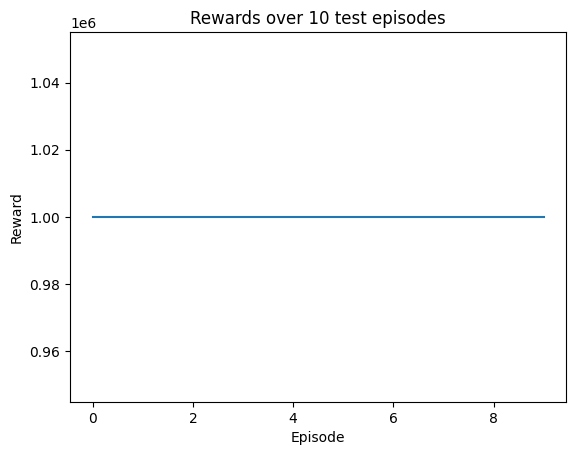

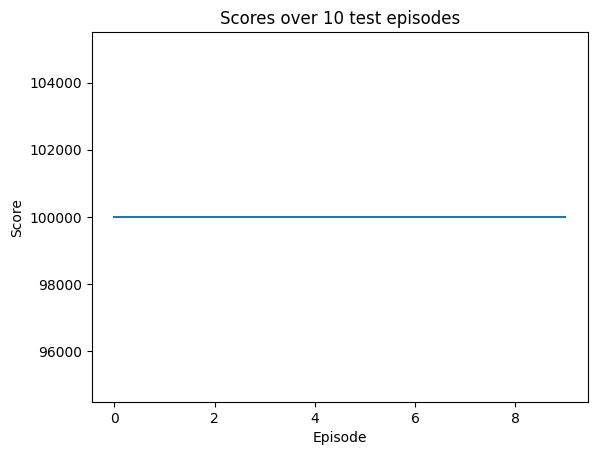

In [6]:
# test the trained agent for 10 episodes
env = gym.make('TextFlappyBird-v0', height=15, width=20, pipe_gap=4)
n_episodes=10
test_rewards,test_scores = mc_agent.test(env,n_episodes)
print(f"Average reward over {n_episodes} test episodes:", np.mean(test_rewards))
print(f"Median reward over {n_episodes} test episodes:", np.median(test_rewards))
print(f"Average scores over {n_episodes} test episodes:", np.mean(test_scores))
print(f"Median scores over {n_episodes} test episodes:", np.median(test_scores))


# plot the rewards
plt.plot(test_rewards)
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.title(f"Rewards over {n_episodes} test episodes")
plt.show()

# plot the scores
plt.plot(test_scores)
plt.xlabel("Episode")
plt.ylabel("Score")
plt.title(f"Scores over {n_episodes} test episodes")
plt.show()

In [8]:
env = gym.make('TextFlappyBird-v0', height=15, width=20, pipe_gap=4)
mc_agent = MonteCarlo(gamma=0.9, epsilon=0.1)
mc_agent.run(env)

Text Flappy Bird!
Score: 0
----------------------
[                  | ]
[                    ]
[                    ]
[                    ]
[                    ]
[                  | ]
[                  | ]
[      @           | ]
[                  | ]
[                  | ]
[                  | ]
[                  | ]
[                  | ]
[                  | ]
[                  | ]
^^^^^^^^^^^^^^^^^^^^^^
Player Action (Idle)
Distance From Pipe (dx=12,dy=4)
Text Flappy Bird!
Score: 0
----------------------
[                 |  ]
[                    ]
[                    ]
[                    ]
[                    ]
[                 |  ]
[                 |  ]
[                 |  ]
[                 |  ]
[      @          |  ]
[                 |  ]
[                 |  ]
[                 |  ]
[                 |  ]
[                 |  ]
^^^^^^^^^^^^^^^^^^^^^^
Player Action (Idle)
Distance From Pipe (dx=11,dy=6)
Text Flappy Bird!
Score: 0
----------------------
[       

0